# Homework 4

---
## Name: Jerry Allan Akshay  
## Github ID: fallen-axe-shay  
## USC ID: 8603760284  
---

### Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from os import listdir
from os.path import isfile, join
from IPython.display import IFrame
import math
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from IPython.display import IFrame, HTML
import warnings
warnings.filterwarnings('ignore')

C:\Users\allan\anaconda3\envs\ml-ds-hw3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


---
### HW 3 Part

#### 1. c) i. List of time domain features used in time-series classification

1. Minimum
2. Maximum
3. Mean
4. Median
5. Standard Deviation
6. First Quartile
7. Third Quartile
8. Mean Absolute Value
9. Root Mean Square
10. Variance
11. Kurtosis
12. Skewness
13. Count per hour / minute / second
14. Lag Features
15. Rolling Window Mean
16. Expanding Window Mean

##### Reference
1. https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/
2. https://stats.stackexchange.com/questions/50807/features-for-time-series-classification
3. https://www.researchgate.net/figure/Time-domain-features_tbl1_306269759

#### 1. c) ii. Extraction of Time-Domain Features

In [2]:
def getFolderPath(data_path, folder, train_test):
    return data_path + '/' + folder + '/' + train_test + '/'

In [3]:
data_path = '../data'
data_frames = {}
folder_names = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
for folder in folder_names:
    data_frames[folder] = {}
    train_path = getFolderPath(data_path, folder, 'train-data')
    data_files = [f for f in listdir(train_path) if isfile(join(train_path, f))]
    for file in data_files:
        data_frames[folder][file] = pd.read_csv(train_path + file, skiprows=4)
        data_frames[folder][file].rename(columns = {"# Columns: time": "time"}, inplace = True)
        data_frames[folder][file].set_index(['time'], inplace=True)
    test_path = getFolderPath(data_path, folder, 'test-data')
    data_files = [f for f in listdir(test_path) if isfile(join(test_path, f))]
    for file in data_files:
        data_frames[folder][file] = pd.read_csv(test_path + file, skiprows=4)
        data_frames[folder][file].rename(columns = {"# Columns: time": "time"}, inplace = True)
        data_frames[folder][file].set_index(['time'], inplace=True)

In [4]:
time_domain_features_data = {
    'Instance':  []
}

counter = 0

for activity in data_frames:
    for instance in data_frames[activity]:
        counter += 1
        time_domain_features_data['Instance'].append(counter)
        columns = data_frames[activity][instance].columns
        column_count = 0
        for column in columns:
            column_count += 1
            if ('Min ' + str(column_count)) not in time_domain_features_data:
                time_domain_features_data[('Min ' + str(column_count))] = []
            if ('Max ' + str(column_count)) not in time_domain_features_data:
                time_domain_features_data[('Max ' + str(column_count))] = []
            if ('Mean ' + str(column_count)) not in time_domain_features_data:
                time_domain_features_data[('Mean ' + str(column_count))] = []
            if ('Median ' + str(column_count)) not in time_domain_features_data:
                time_domain_features_data[('Median ' + str(column_count))] = []
            if ('Standard Deviation ' + str(column_count)) not in time_domain_features_data:
                time_domain_features_data[('Standard Deviation ' + str(column_count))] = []
            if ('First Quartile ' + str(column_count)) not in time_domain_features_data:
                time_domain_features_data[('First Quartile ' + str(column_count))] = []
            if ('Third Quartile ' + str(column_count)) not in time_domain_features_data:
                time_domain_features_data[('Third Quartile ' + str(column_count))] = []
            time_domain_features_data[('Min ' + str(column_count))].append(data_frames[activity][instance][column].min())
            time_domain_features_data[('Max ' + str(column_count))].append(data_frames[activity][instance][column].max())
            time_domain_features_data[('Mean ' + str(column_count))].append(data_frames[activity][instance][column].mean())
            time_domain_features_data[('Median ' + str(column_count))].append(data_frames[activity][instance][column].median())
            time_domain_features_data[('Standard Deviation ' + str(column_count))].append(data_frames[activity][instance][column].std())
            time_domain_features_data[('First Quartile ' + str(column_count))].append(np.percentile(data_frames[activity][instance][column], 25))
            time_domain_features_data[('Third Quartile ' + str(column_count))].append(np.percentile(data_frames[activity][instance][column], 75))

In [5]:
time_domain_features_data = pd.DataFrame(time_domain_features_data)
time_domain_features_data.set_index('Instance', inplace=True)
time_domain_features_data

,Min 1,Max 1,Mean 1,Median 1,Standard Deviation 1,First Quartile 1,Third Quartile 1,Min 2,Max 2,Mean 2,...,Standard Deviation 5,First Quartile 5,Third Quartile 5,Min 6,Max 6,Mean 6,Median 6,Standard Deviation 6,First Quartile 6,Third Quartile 6
Instance,,,,,,,,,,,,,,,,,,,,,
1,35.00,47.40,43.954500,44.330,1.558835,43.00,45.00,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.000,0.9400
2,33.00,47.75,42.179813,43.500,3.670666,39.15,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.000,1.0000
3,33.00,45.75,41.678063,41.750,2.243490,41.33,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.000,0.5000
4,37.00,48.00,43.454958,43.250,1.386098,42.50,45.00,0.0,1.58,0.378083,...,2.488862,22.2500,24.00,0.0,5.26,0.679646,0.500,0.622534,0.430,0.8700
5,36.25,48.00,43.969125,44.500,1.618364,43.31,44.67,0.0,1.50,0.413125,...,3.318301,20.5000,23.75,0.0,2.96,0.555313,0.490,0.487826,0.000,0.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,18.33,45.75,34.599875,35.125,4.731790,31.50,38.00,0.0,15.37,4.398833,...,2.905688,14.0000,18.25,0.0,8.86,3.289542,3.015,1.680170,2.120,4.2600
85,15.50,43.67,34.225875,34.750,4.441798,31.25,37.25,0.0,17.24,4.354500,...,2.992920,14.3300,18.25,0.0,9.42,3.479542,3.270,1.761146,2.240,4.5375
86,19.33,43.50,34.227771,35.500,4.889576,30.50,37.75,0.0,14.50,3.995729,...,3.092094,14.7500,18.67,0.0,9.74,3.394125,3.100,1.792090,2.105,4.4250


#### 1. c) iii. Standard Deviation of each Time-Domain Feature

Reference: https://towardsdatascience.com/calculating-confidence-interval-with-bootstrapping-872c657c058d

In [6]:
def get_bs_replicates(data,func,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
    return bs_replicates

In [7]:
standard_deviations = {
    'Feature':  [],
    'Observed Standard Deviation': [],
    'Bootstrapped Standard Deviation': [],
    'Bootstrapped Confidence Interval': []
}

for column in time_domain_features_data.columns:
    if(column == 'Instance'):
        continue
    standard_deviations['Feature'].append(column)
    standard_deviations['Observed Standard Deviation'].append(time_domain_features_data[column].std())
    # Using the Bootstrap method and running the iteration 2000 times
    bs_replicates = get_bs_replicates(time_domain_features_data[column],np.nanstd,2000)
    standard_deviations['Bootstrapped Standard Deviation'].append(np.mean(bs_replicates))
    # Get the corresponding values of 5th and 95th percentiles (For 90% Confidence Interval)
    conf_interval = np.percentile(bs_replicates, [5,95])
    standard_deviations['Bootstrapped Confidence Interval'].append('[' + str(conf_interval[0]) + ', ' + str(conf_interval[1]) + ']')
    

standard_deviations_df = pd.DataFrame(standard_deviations)
standard_deviations_df.set_index('Feature', inplace=True)
standard_deviations_df

,Observed Standard Deviation,Bootstrapped Standard Deviation,Bootstrapped Confidence Interval
Feature,,,
Min 1,9.624011,9.479481,"[8.298604629590201, 10.790879938548716]"
Max 1,4.207745,4.109344,"[3.1373436504616605, 5.075460156039286]"
Mean 1,5.276431,5.197610,"[4.620253116803701, 5.780693998052096]"
Median 1,5.386624,5.316019,"[4.7050109229262675, 5.943178158407173]"
Standard Deviation 1,1.771282,1.747507,"[1.5630476194518022, 1.9310027960959115]"
First Quartile 1,6.127846,6.051417,"[5.49722335530864, 6.587023718694044]"
Third Quartile 1,5.031028,4.945180,"[4.166473884045841, 5.766696537450202]"
Min 2,0.000000,0.000000,"[0.0, 0.0]"
Max 2,5.059656,4.995330,"[4.607760115207727, 5.374960986454913]"


#### 1. c) iv. Three most important Time Domain Features

From the confidence interval gaps shown above, we can choose <b>Minimum</b>, <b>Standard Deviation</b>, and <b>First Quartile</b> as the three most important time domain features as we can map their true real-word values to a relatively smaller range of values (confidence interval gap) with a confidence of 90%.

---
### HW 4 Part

## Answers
----

In [8]:
CSS = """div.output_area img {max-width:None !important;max-height: None !important";}"""
display(HTML('<style>{}</style>'.format(CSS)))

#### 2. a) Binary Classification using Logistic Regression

In [9]:
def getFolderPath(data_path, folder, train_test):
    return data_path + '/' + folder + '/' + train_test + '/'

In [10]:
def getFileReadHelper(path):
    data_path = '../data'
    data_frames = {}
    folder_names = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
    for folder in folder_names:
        data_frames[folder] = {}
        train_path = getFolderPath(data_path, folder, path)
        data_files = [f for f in listdir(train_path) if isfile(join(train_path, f))]
        for file in data_files:
            data_frames[folder][file] = pd.read_csv(train_path + file, skiprows=4).fillna(value = 0)
            data_frames[folder][file].rename(columns = {"# Columns: time": "time"}, inplace = True)
            data_frames[folder][file].set_index(['time'], inplace=True)
            data_frames[folder][file] = data_frames[folder][file].fillna(0)
    return data_frames

In [11]:
def getTimeDomainFeatures(train = False):
    data_frames = getFileReadHelper('train-data' if train else 'test-data')
    time_domain_features_data = {
        'Instance':  [],
        'Activity': []
    }

    counter = 0

    for activity in data_frames:
        for instance in data_frames[activity]:
            counter += 1
            time_domain_features_data['Instance'].append(counter)
            time_domain_features_data['Activity'].append(activity)
            columns = data_frames[activity][instance].columns
            column_count = 0
            for column in columns:
                column_count += 1
                if ('Min ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Min ' + str(column_count))] = []
                if ('Max ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Max ' + str(column_count))] = []
                if ('Mean ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Mean ' + str(column_count))] = []
                if ('Median ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Median ' + str(column_count))] = []
                if ('Standard Deviation ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Standard Deviation ' + str(column_count))] = []
                if ('First Quartile ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('First Quartile ' + str(column_count))] = []
                if ('Third Quartile ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Third Quartile ' + str(column_count))] = []
                time_domain_features_data[('Min ' + str(column_count))].append(data_frames[activity][instance][column].min())
                time_domain_features_data[('Max ' + str(column_count))].append(data_frames[activity][instance][column].max())
                time_domain_features_data[('Mean ' + str(column_count))].append(data_frames[activity][instance][column].mean())
                time_domain_features_data[('Median ' + str(column_count))].append(data_frames[activity][instance][column].median())
                time_domain_features_data[('Standard Deviation ' + str(column_count))].append(data_frames[activity][instance][column].std())
                time_domain_features_data[('First Quartile ' + str(column_count))].append(np.percentile(data_frames[activity][instance][column], 25))
                time_domain_features_data[('Third Quartile ' + str(column_count))].append(np.percentile(data_frames[activity][instance][column], 75))
    time_domain_features_data = pd.DataFrame(time_domain_features_data)
    time_domain_features_data.set_index('Instance', inplace=True)
    return time_domain_features_data

In [12]:
time_domain_features_data_train = getTimeDomainFeatures(True)
time_domain_features_data_test = getTimeDomainFeatures(False)

#### 2. a) i.

In [13]:
three_features = ['Min', 'Standard Deviation', 'First Quartile']
three_timeseries = ['1', '2', '6']

In [14]:
time_domain_reduced = time_domain_features_data_train[['Activity', f'{three_features[0]} {three_timeseries[0]}', f'{three_features[1]} {three_timeseries[0]}', f'{three_features[2]} {three_timeseries[0]}', f'{three_features[0]} {three_timeseries[1]}', f'{three_features[1]} {three_timeseries[1]}', f'{three_features[2]} {three_timeseries[1]}', f'{three_features[0]} {three_timeseries[2]}', f'{three_features[1]} {three_timeseries[2]}', f'{three_features[2]} {three_timeseries[2]}']]

In [15]:
bending = time_domain_reduced.loc[(time_domain_reduced['Activity']=='bending1') | (time_domain_reduced['Activity']=='bending2')]
non_bending = time_domain_reduced.loc[(time_domain_reduced['Activity']!='bending1') & (time_domain_reduced['Activity']!='bending2')]

In [16]:
def plotScatter(data):
    data = data.replace('bending2', 'bending')
    data = data.replace('bending1', 'bending')
    data['Activity'].loc[data['Activity']!='bending'] = 'other activities'  
    pairplot_fig = sns.pairplot(data, vars = data.columns[1:], hue="Activity")
    plt.subplots_adjust(top=0.95)
    pairplot_fig.fig.suptitle("Scatter plots among all features in the data set", fontsize=18, alpha=0.9, weight='bold')
    plt.show()

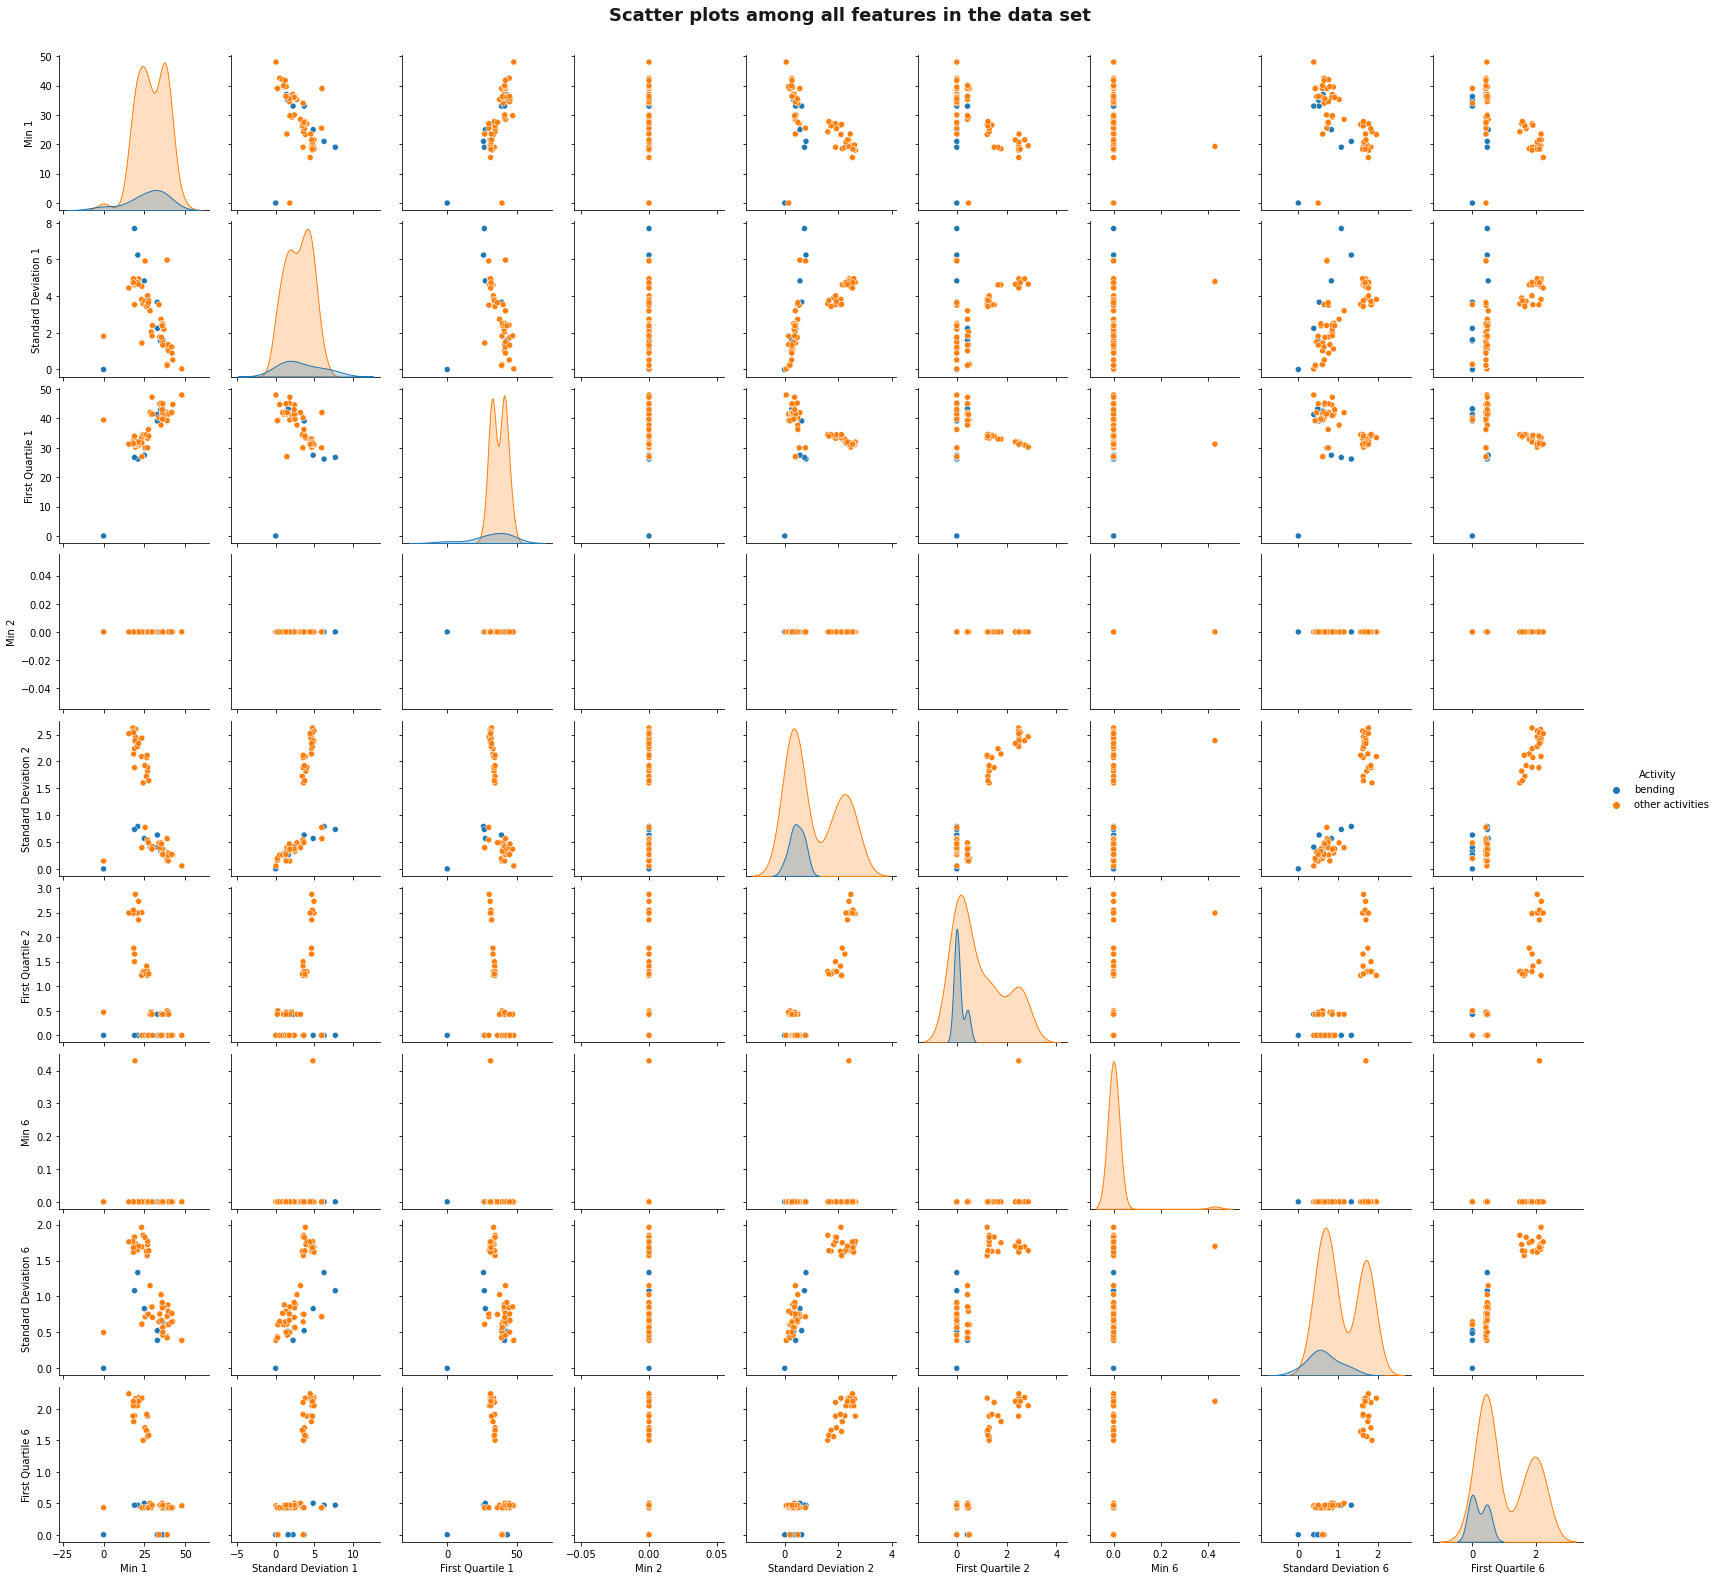

In [17]:
plotScatter(time_domain_reduced.reset_index(drop=True))

#### 2. a) ii.

In [18]:
def getTimeDomainFeaturesDivided(factor, train = False):
    data_frames = getFileReadHelper('train-data' if train else 'test-data')
    time_domain_features_data = {
        'Instance':  [],
        'Activity': []
    }

    counter = 0

    for activity in data_frames:
        for instance in data_frames[activity]:
            counter += 1
            time_domain_features_data['Instance'].append(counter)
            time_domain_features_data['Activity'].append(activity)
            rows = data_frames[activity][instance].shape[0]
            original_columns = data_frames[activity][instance].columns
            divide_amt = rows//factor
            new_df = None
            for i in range(factor-1):
                second_half = data_frames[activity][instance].tail(divide_amt)
                second_half = second_half.rename(columns={x: f'{x}_{i+1}' for x in original_columns})
                new_df = second_half if new_df is None else pd.concat([new_df.reset_index(drop=True), second_half.reset_index(drop=True)], axis=1)     
                data_frames[activity][instance] = data_frames[activity][instance].head(rows-(divide_amt))
                rows = rows - (divide_amt)
            if new_df is not None:
                data_frames[activity][instance] = pd.concat([data_frames[activity][instance].reset_index(drop=True), new_df.reset_index(drop=True)], axis=1)
            columns = data_frames[activity][instance].columns
            column_count = 0
            for column in columns:
                column_count += 1
                if ('Min ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Min ' + str(column_count))] = []
                if ('Max ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Max ' + str(column_count))] = []
                if ('Mean ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Mean ' + str(column_count))] = []
                if ('Median ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Median ' + str(column_count))] = []
                if ('Standard Deviation ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Standard Deviation ' + str(column_count))] = []
                if ('First Quartile ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('First Quartile ' + str(column_count))] = []
                if ('Third Quartile ' + str(column_count)) not in time_domain_features_data:
                    time_domain_features_data[('Third Quartile ' + str(column_count))] = []
                time_domain_features_data[('Min ' + str(column_count))].append(data_frames[activity][instance][column].min())
                time_domain_features_data[('Max ' + str(column_count))].append(data_frames[activity][instance][column].max())
                time_domain_features_data[('Mean ' + str(column_count))].append(data_frames[activity][instance][column].mean())
                time_domain_features_data[('Median ' + str(column_count))].append(data_frames[activity][instance][column].median())
                time_domain_features_data[('Standard Deviation ' + str(column_count))].append(data_frames[activity][instance][column].std())
                time_domain_features_data[('First Quartile ' + str(column_count))].append(np.percentile(data_frames[activity][instance][column], 25))
                time_domain_features_data[('Third Quartile ' + str(column_count))].append(np.percentile(data_frames[activity][instance][column], 75))
    time_domain_features_data = pd.DataFrame(time_domain_features_data)
    time_domain_features_data.set_index('Instance', inplace=True)
    return time_domain_features_data

In [19]:
time_domain_features_data_train_halved = getTimeDomainFeaturesDivided(2,True)

In [20]:
time_domain_features_data_train_halved

,Activity,Min 1,Max 1,Mean 1,Median 1,Standard Deviation 1,First Quartile 1,Third Quartile 1,Min 2,Max 2,...,Standard Deviation 11,First Quartile 11,Third Quartile 11,Min 12,Max 12,Mean 12,Median 12,Standard Deviation 12,First Quartile 12,Third Quartile 12
Instance,,,,,,,,,,,,,,,,,,,,,
1,bending1,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,0.0,1.50,...,2.298693,33.0000,36.2500,0.00,1.50,0.388333,0.000,0.478528,0.0000,0.7100
2,bending1,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,0.0,3.00,...,3.760118,28.7500,33.7500,0.00,2.18,0.586083,0.470,0.491873,0.0000,0.8700
3,bending1,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,0.0,2.83,...,2.062647,28.3100,30.5625,0.00,1.50,0.347500,0.430,0.363144,0.0000,0.5000
4,bending1,39.00,48.00,44.117042,45.000,1.359836,43.5000,45.0000,0.0,1.30,...,1.881721,22.5000,23.7500,0.00,4.06,0.543875,0.500,0.473445,0.4300,0.7100
5,bending1,36.67,45.00,43.486208,43.710,1.281976,42.3300,44.5000,0.0,1.30,...,1.929494,21.0000,23.5000,0.00,2.96,0.585750,0.500,0.487918,0.4225,0.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,walking,22.33,46.00,34.966250,35.500,4.733014,32.0000,38.7500,0.0,12.68,...,3.325780,14.0000,18.5000,0.00,9.39,3.430208,3.350,1.647979,2.1700,4.4400
66,walking,21.50,45.67,34.737042,35.500,4.276717,32.0000,37.7500,0.0,12.21,...,3.148561,14.5000,18.2500,0.00,10.21,3.225917,3.085,1.665326,2.0500,4.3500
67,walking,18.33,45.00,33.886458,34.375,5.143776,30.4575,37.5000,0.0,12.44,...,3.389030,13.6275,18.2500,0.00,8.01,3.274750,2.955,1.670593,2.0500,4.4375


In [21]:
time_domain_reduced_first_half = time_domain_features_data_train_halved[['Activity', f'{three_features[0]} {three_timeseries[0]}', f'{three_features[1]} {three_timeseries[0]}', f'{three_features[2]} {three_timeseries[0]}', f'{three_features[0]} {three_timeseries[1]}', f'{three_features[1]} {three_timeseries[1]}', f'{three_features[2]} {three_timeseries[1]}', f'{three_features[0]} {three_timeseries[2]}', f'{three_features[1]} {three_timeseries[2]}', f'{three_features[2]} {three_timeseries[2]}']]
time_domain_reduced_second_half = time_domain_features_data_train_halved[[f'{three_features[0]} {6 + int(three_timeseries[0])}', f'{three_features[1]} {6 + int(three_timeseries[0])}', f'{three_features[2]} {6 + int(three_timeseries[0])}', f'{three_features[0]} {6 + int(three_timeseries[1])}', f'{three_features[1]} {6 + int(three_timeseries[1])}', f'{three_features[2]} {6 + int(three_timeseries[1])}', f'{three_features[0]} {6 + int(three_timeseries[2])}', f'{three_features[1]} {6 + int(three_timeseries[2])}', f'{three_features[2]} {6 + int(three_timeseries[2])}']]
time_domain_reduced = pd.concat([time_domain_reduced_first_half, time_domain_reduced_second_half], axis=1)

In [22]:
bending = time_domain_reduced.loc[(time_domain_reduced_first_half['Activity']=='bending1') | (time_domain_reduced_first_half['Activity']=='bending2')]
non_bending = time_domain_reduced.loc[(time_domain_reduced_first_half['Activity']!='bending1') & (time_domain_reduced_first_half['Activity']!='bending2')]

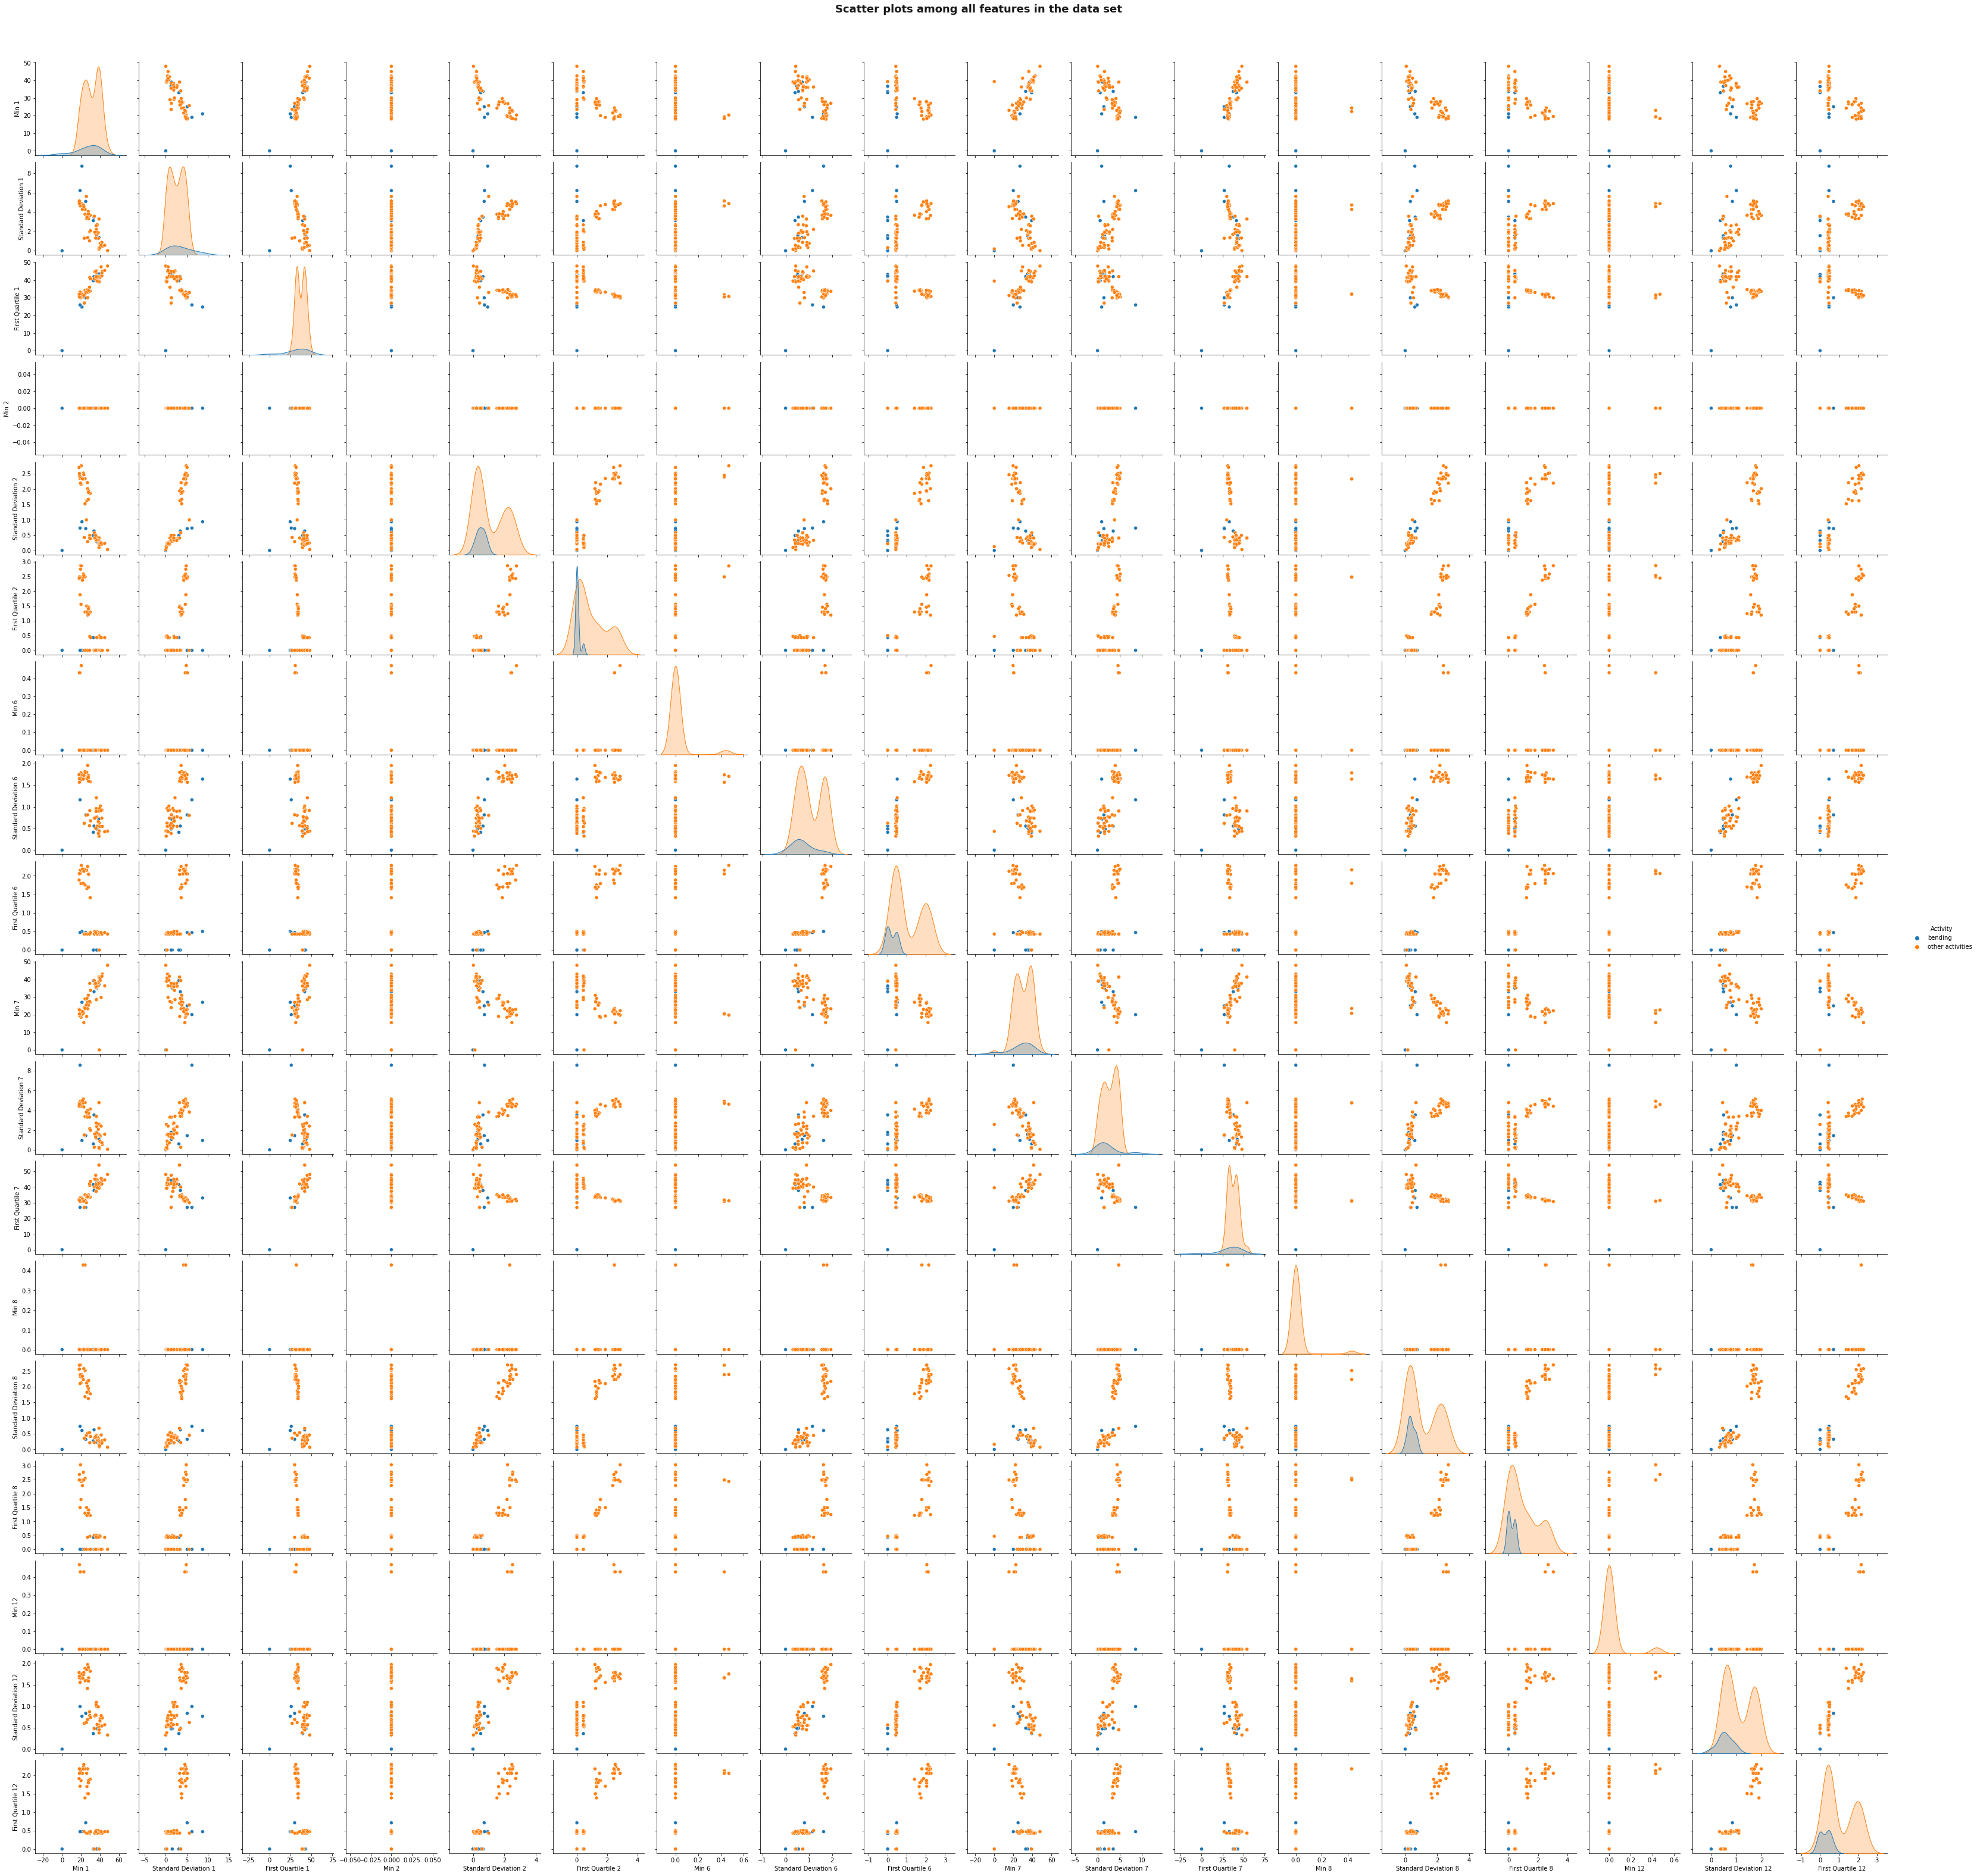

In [23]:
plotScatter(time_domain_reduced.reset_index(drop=True))

#### Findings
1. From the graphs above, we don't find considereable differences in the scatter plots of the time series data from that shown earlier.
2. The only difference we find is the addition of extra sub-plots as we have a greater number of features in the second pairwise scatterplot graph.

#### 2. a) iii. 

In [24]:
log_reg_values = []
for l in range(1,21):
    td_features = getTimeDomainFeaturesDivided(l,True)
    td_features = td_features.fillna(0)
    td_features.loc[((td_features['Activity']=='bending1') | (td_features['Activity']=='bending2')), 'Activity'] = 1
    td_features.loc[(td_features['Activity']!=1), 'Activity'] = 0
    time_series_features = td_features['Activity']
    for i in range(l):
        selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
        temp = td_features[selectors]
        time_series_features = pd.concat([time_series_features, temp], axis=1)
    td_features = time_series_features.sample(frac=1).reset_index(drop=True)
    y = td_features['Activity'].astype(int)
    x = td_features.drop(['Activity'], axis= 1)
    # Using Backward Selection to select the best set of features
    model = LogisticRegression(C=1000000000000)
    rfe = RFECV(estimator=model, step=1, cv=5)
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    n_scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    rfe.fit(x, y)
    n = len(list(filter(None, rfe.support_)))
    log_reg_values.append({
        'l': l,
        'p': n,
        'Accuracy': np.mean(n_scores)
    })

#### Right way to perform cross-validation
1. The <b>CORRECT</b> way to apply cross-validation is to select the features **p** in every fold, and then proceed to cross-validate across all the folds.
2. The <b>WRONG</b> way would be to choose the a "best" set of features <b>p</b> first, and then apply the same set of features <b>p</b> to all the k folds during cross-validation in the final step.

In [25]:
log_reg_values.sort(key = lambda x: x['Accuracy'], reverse = True)
for i in range(5):
    print(f'l: {log_reg_values[i]["l"]}, p: {log_reg_values[i]["p"]}, Accuracy: {log_reg_values[i]["Accuracy"]}')

l: 9, p: 8, Accuracy: 0.9274725274725275
l: 2, p: 2, Accuracy: 0.9131868131868132
l: 11, p: 1, Accuracy: 0.8989010989010989
l: 4, p: 5, Accuracy: 0.8703296703296705
l: 19, p: 2, Accuracy: 0.8703296703296702


In [26]:
best_l_p_pair = log_reg_values[0]

##### Reference: 
1. [Link](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)
2. [Link](https://machinelearningmastery.com/rfe-feature-selection-in-python/)

#### Findings:
1. We don't use large p values as the p value would be too large for the given sample size and we risk overfitting.
2. Hence, we'll choose l = 9 and p = 8.
3. The best **l** value is 9.
4. The best **p** value is 8.
5. The best **Accuracy** is 0.93

#### 2. a) iv.

In [27]:
l = best_l_p_pair['l']
n = best_l_p_pair['p']
td_features = getTimeDomainFeaturesDivided(l,True)
td_features = td_features.fillna(0)
td_features.loc[((td_features['Activity']=='bending1') | (td_features['Activity']=='bending2')), 'Activity'] = 1
td_features.loc[(td_features['Activity']!=1), 'Activity'] = 0
time_series_features = td_features['Activity']
for i in range(l):
    selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
    temp = td_features[selectors]
    time_series_features = pd.concat([time_series_features, temp], axis=1)
td_features = time_series_features.sample(frac=1).reset_index(drop=True)
y = td_features['Activity'].astype(int)
x = td_features.drop(['Activity'], axis= 1)
model = LogisticRegression(C=1000000000000)
rfe = RFE(estimator=LogisticRegression(C=1000000000000), n_features_to_select=n)
rfe = rfe.fit(x, y)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(x, y)
y_pred = pipeline.predict(x)
cnf_matrix = metrics.confusion_matrix(y, y_pred)
probs = pipeline.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

Text(0.5, 257.44, 'Predicted label')

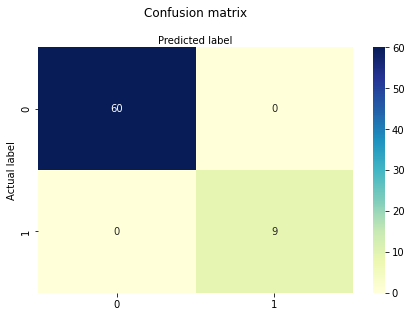

In [28]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

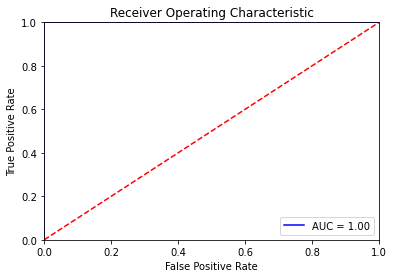

In [29]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
rfe = RFE(estimator=LogisticRegression(C=1000000000000), n_features_to_select=n)
rfe = rfe.fit(x, y)
col = []
for idx,val in enumerate(x.columns):
    if rfe.support_[idx]:
        col.append(val)
logit_model=sm.Logit(y,x[col])
result=logit_model.fit(maxiter=100)
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.120639
         Iterations 10
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.688     
Dependent Variable:   Activity           AIC:                32.6481   
Date:                 2022-02-28 21:31   BIC:                50.5210   
No. Observations:     69                 Log-Likelihood:     -8.3241   
Df Model:             7                  LL-Null:            -26.718   
Df Residuals:         61                 LLR p-value:        5.1467e-06
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       10.0000                                          
-----------------------------------------------------------------------
                       Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
Standard Deviation 2    1.8044   7.7442  0.2330 0.8158 -13.374

In [31]:
selected_features = col

#### 2. a) v.

In [32]:
l = best_l_p_pair['l']
n = best_l_p_pair['p']
td_features = getTimeDomainFeaturesDivided(l,False)
td_features = td_features.fillna(0)
td_features.loc[((td_features['Activity']=='bending1') | (td_features['Activity']=='bending2')), 'Activity'] = 1
td_features.loc[(td_features['Activity']!=1), 'Activity'] = 0
time_series_features = td_features['Activity']
for i in range(l):
    selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
    temp = td_features[selectors]
    time_series_features = pd.concat([time_series_features, temp], axis=1)
td_features = time_series_features.sample(frac=1).reset_index(drop=True)
y = td_features['Activity'].astype(int)
x = td_features.drop(['Activity'], axis= 1)
x = x[selected_features]
model = LogisticRegression(C=1000000000000)
model.fit(x, y)
score = model.score(x,y)
print(f'Accuracy: {score*100}')

Accuracy: 100.0


Text(0.5, 257.44, 'Predicted label')

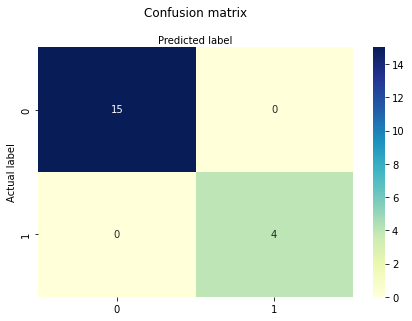

In [33]:
y_pred = model.predict(x)
cnf_matrix = metrics.confusion_matrix(y, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
summary_data = {'Dataset':  ['Test Set', 'Train Set (Cross-Validation)'],
                'Accuracy': [f'{score*100:.2f}%', f'{best_l_p_pair["Accuracy"]*100:.2f}%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Dataset')

,Accuracy
Dataset,
Test Set,100.00%
Train Set (Cross-Validation),92.75%


#### 2. a) vi.

#### Findings
1. No, the classes and the features used in the **final model** do not seem to be well-separated to cause instability in calculating logistic regression parameters.
2. But, when all the time-series features were used, the logistic regression model did become unstable as a linear separation of the classes did exist (due to large number of features and few sample instances, causing overfitting). 
3. **An example is shown below for a perfect separation of classes. The python logistic regression package throws an error as perfection separation exists**

In [35]:
try:
    l = best_l_p_pair['l']
    n = best_l_p_pair['p']
    td_features = getTimeDomainFeaturesDivided(l,False)
    td_features = td_features.fillna(0)
    td_features.loc[((td_features['Activity']=='bending1') | (td_features['Activity']=='bending2')), 'Activity'] = 1
    td_features.loc[(td_features['Activity']!=1), 'Activity'] = 0
    time_series_features = td_features['Activity']
    for i in range(l):
        selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
        temp = td_features[selectors]
        time_series_features = pd.concat([time_series_features, temp], axis=1)
    td_features = time_series_features.sample(frac=1).reset_index(drop=True)
    y = td_features['Activity'].astype(int)
    x = td_features.drop(['Activity'], axis= 1)
    logit_model=sm.Logit(y,x)
    result=logit_model.fit()
    print(result.summary2())
except Exception as e:
    print(e)

Perfect separation detected, results not available


----

_Note: The error above is for the purposes of demonstration and is intentional._

----

#### 2. a) vii.

#### Findings
1. Yes, we do see a class imbalance as there are only 9 instances of class 'bending', while there are 60 instances of class 'non-bending'.
2. We can use the oversampling technique SMOTE (Synthetic Minority Oversampling Technique) to create balanced classes.

In [36]:
log_reg_values_balanced = []
for l in range(1,21):
    td_features = getTimeDomainFeaturesDivided(l,True)
    td_features = td_features.fillna(0)
    td_features.loc[((td_features['Activity']=='bending1') | (td_features['Activity']=='bending2')), 'Activity'] = 1
    td_features.loc[(td_features['Activity']!=1), 'Activity'] = 0
    time_series_features = td_features['Activity']
    for i in range(l):
        selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
        temp = td_features[selectors]
        time_series_features = pd.concat([time_series_features, temp], axis=1)
    td_features = time_series_features.sample(frac=1).reset_index(drop=True)
    y = td_features['Activity'].astype(int)
    x = td_features.drop(['Activity'], axis= 1)
    
    os = SMOTE(random_state=0)
    os_data_x, os_data_y = os.fit_resample(x, y)
    os_data_x = pd.DataFrame(data=os_data_x, columns=x.columns)
    os_data_y= pd.DataFrame(data=os_data_y, columns=['Activity'])
    
    # Using Backward Selection to select the best set of features
    model = LogisticRegression(C=1000000000000)
    rfe = RFECV(estimator=model, step=1, cv=5)
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    n_scores = cross_val_score(pipeline, os_data_x, os_data_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    rfe.fit(os_data_x, os_data_y)
    n = len(list(filter(None, rfe.support_)))
    log_reg_values_balanced.append({
        'l': l,
        'p': n,
        'Accuracy': np.mean(n_scores)
    })

In [37]:
log_reg_values_balanced.sort(key = lambda x: x['Accuracy'], reverse = True)
for i in range(5):
    print(f'l: {log_reg_values_balanced[i]["l"]}, p: {log_reg_values_balanced[i]["p"]}, Accuracy: {log_reg_values_balanced[i]["Accuracy"]}')

l: 7, p: 26, Accuracy: 0.975
l: 17, p: 74, Accuracy: 0.975
l: 11, p: 46, Accuracy: 0.9666666666666668
l: 5, p: 12, Accuracy: 0.9666666666666666
l: 8, p: 7, Accuracy: 0.9583333333333334


In [38]:
best_l_p_pair_balanced = log_reg_values_balanced[0]

In [39]:
l = best_l_p_pair_balanced['l']
n = best_l_p_pair_balanced['p']

td_features = getTimeDomainFeaturesDivided(l,True)
td_features = td_features.fillna(0)
td_features.loc[((td_features['Activity']=='bending1') | (td_features['Activity']=='bending2')), 'Activity'] = 1
td_features.loc[(td_features['Activity']!=1), 'Activity'] = 0
time_series_features = td_features['Activity']
for i in range(l):
    selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
    temp = td_features[selectors]
    time_series_features = pd.concat([time_series_features, temp], axis=1)
td_features = time_series_features.sample(frac=1).reset_index(drop=True)
y_train = td_features['Activity'].astype(int)
x_train = td_features.drop(['Activity'], axis= 1)

td_features = getTimeDomainFeaturesDivided(l,False)
td_features = td_features.fillna(0)
td_features.loc[((td_features['Activity']=='bending1') | (td_features['Activity']=='bending2')), 'Activity'] = 1
td_features.loc[(td_features['Activity']!=1), 'Activity'] = 0
time_series_features = td_features['Activity']
for i in range(l):
    selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
    temp = td_features[selectors]
    time_series_features = pd.concat([time_series_features, temp], axis=1)
td_features = time_series_features.sample(frac=1).reset_index(drop=True)
y_test = td_features['Activity'].astype(int)
x_test = td_features.drop(['Activity'], axis= 1)

os = SMOTE(random_state=0)
os_data_x, os_data_y = os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x, columns=x_train.columns)
os_data_y= pd.DataFrame(data=os_data_y, columns=['Activity'])

rfe = RFE(estimator=LogisticRegression(C=1000000000000), n_features_to_select=n)
rfe = rfe.fit(os_data_x, os_data_y)
col = []
for idx,val in enumerate(os_data_x.columns):
    if rfe.support_[idx]:
        col.append(val)

In [40]:
os_data_x = os_data_x[col]
model = LogisticRegression(C=1000000000000)
model.fit(os_data_x, os_data_y)

LogisticRegression(C=1000000000000)

#### The results obtained on oversampled train data

In [41]:
y_pred = model.predict(os_data_x)
cnf_matrix = metrics.confusion_matrix(os_data_y, y_pred)
probs = model.predict_proba(os_data_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(os_data_y, preds)
roc_auc = metrics.auc(fpr, tpr)

Text(0.5, 257.44, 'Predicted label')

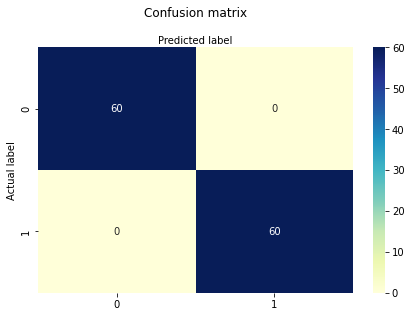

In [42]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

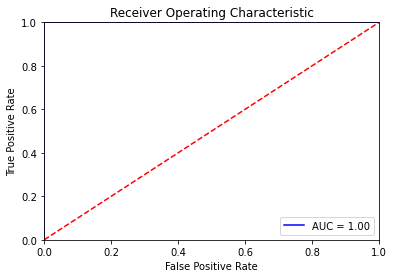

In [43]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### The results obtained on non-oversampled test data

In [44]:
y_pred = model.predict(x_test[col])
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
probs = model.predict_proba(x_test[col])
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

Text(0.5, 257.44, 'Predicted label')

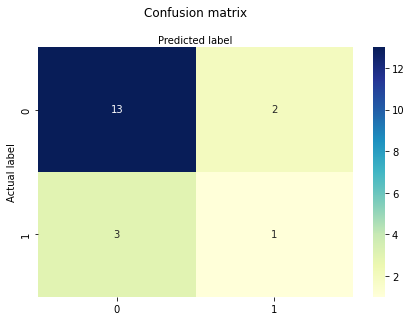

In [45]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

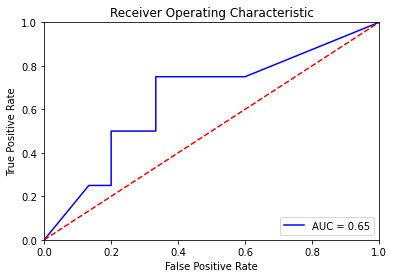

In [46]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Findings
1. Building a logistic regression model using balanced classes helped us generate a model that generalizes well.
2. Above, we can see the Confusion Matrix, ROC and AUC when the 'balanced' logistic regression model is applied to the test set.

#### 2. b) Binary Classification using L1 penalized Logistic Regression

#### 2. b) i.

In [47]:
c_param_range = [10**x for x in range(-10, 11)]
log_reg_values_l1 = []
for l in range(1,21):
    td_features = getTimeDomainFeaturesDivided(l,True)
    td_features = td_features.fillna(0)
    td_features.loc[((td_features['Activity']=='bending1') | (td_features['Activity']=='bending2')), 'Activity'] = 1
    td_features.loc[(td_features['Activity']!=1), 'Activity'] = 0
    time_series_features = td_features['Activity']
    for i in range(l):
        selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
        temp = td_features[selectors]
        time_series_features = pd.concat([time_series_features, temp], axis=1)
    td_features = time_series_features.sample(frac=1).reset_index(drop=True)
    y = td_features['Activity'].astype(int)
    x = td_features.drop(['Activity'], axis= 1)
    # Iterating over c values to determine the best combination of c (or lambda) and l
    for c in c_param_range:
        model = LogisticRegression(penalty='l1', C=c, solver='liblinear')
        pipeline = Pipeline(steps=[('scaler', StandardScaler()),('m',model)])
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
        n_scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        log_reg_values_l1.append({
            'l': l,
            'c': c,
            'Accuracy': np.mean(n_scores)
        })

In [48]:
log_reg_values_l1.sort(key = lambda x: x['Accuracy'], reverse=True)
for i in range(5):
    print(f'l: {log_reg_values_l1[i]["l"]}, c: {log_reg_values_l1[i]["c"]}, Accuracy: {log_reg_values_l1[i]["Accuracy"]}')

l: 2, c: 100, Accuracy: 0.9417582417582417
l: 5, c: 10, Accuracy: 0.9285714285714285
l: 2, c: 10, Accuracy: 0.9274725274725275
l: 2, c: 1000, Accuracy: 0.9274725274725275
l: 3, c: 1, Accuracy: 0.9142857142857143


In [49]:
best_l_c_pair = log_reg_values_l1[0]

#### 2. b) ii.

In [50]:
summary_data = {
                'Type of Logistic Regression':  ['L1 Penalized', 'Variable Selection using p-values'],
                'Accuracy': [f'{best_l_c_pair["Accuracy"]*100:.2f}%', f'{best_l_p_pair["Accuracy"]*100:.2f}%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Type of Logistic Regression')

,Accuracy
Type of Logistic Regression,
L1 Penalized,94.18%
Variable Selection using p-values,92.75%


#### Findings
1. We can see that both the L1 penalized method and the variable selection method yield very similar results. So, in this case, both the models almost perform equally well (Although the L1 Penalized method has an edge).
2. The L1 penalized method is easier to implement because we just have to change the lambda (or c value) of the model in each iteration. But in the case of the feature selection method, we need to implement an additional step and loop in each iteration to determine the best set of features for each cross-validation fold.

#### 2. c) Multi-class Classification

#### 2. c) i.

In [51]:
c_param_range = [10**x for x in range(-10, 11)]
log_reg_values_multiclass = []
for l in range(1,21):
    td_features = getTimeDomainFeaturesDivided(l,True)
    td_features = td_features.fillna(0)
    time_series_features = td_features['Activity']
    for i in range(l):
        selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
        temp = td_features[selectors]
        time_series_features = pd.concat([time_series_features, temp], axis=1)
    td_features = time_series_features.sample(frac=1).reset_index(drop=True)
    y = td_features['Activity']
    x = td_features.drop(['Activity'], axis= 1)
    y = y.replace('bending2', 'bending')
    y = y.replace('bending1', 'bending')
    classes = list(y.unique())
    y = y.map({ x: classes.index(x) for x in classes})
    # Iterating over c values to determine the best combination of c (or lambda) and l
    for c in c_param_range:
        model = LogisticRegression(penalty='l1', C=c, solver='saga', multi_class='multinomial')
        pipeline = Pipeline(steps=[('scaler', StandardScaler()),('m',model)])
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
        n_scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        log_reg_values_multiclass.append({
            'l': l,
            'c': c,
            'Accuracy': np.mean(n_scores)
        })

In [52]:
log_reg_values_multiclass.sort(key = lambda x: x['Accuracy'], reverse=True)
for i in range(5):
    print(f'l: {log_reg_values_multiclass[i]["l"]}, c: {log_reg_values_multiclass[i]["c"]}, Accuracy: {log_reg_values_multiclass[i]["Accuracy"]}')

l: 20, c: 10, Accuracy: 0.7527472527472527
l: 20, c: 100, Accuracy: 0.7527472527472527
l: 20, c: 1000, Accuracy: 0.7527472527472527
l: 20, c: 10000, Accuracy: 0.7527472527472527
l: 20, c: 1000000, Accuracy: 0.7527472527472527


In [53]:
best_l_p_pair_multiclass = log_reg_values_multiclass[0]

In [54]:
c = best_l_p_pair_multiclass['c']
l = best_l_p_pair_multiclass['l']
td_features = getTimeDomainFeaturesDivided(l,True)
td_features = td_features.fillna(0)
time_series_features = td_features['Activity']
for i in range(l):
    selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
    temp = td_features[selectors]
    time_series_features = pd.concat([time_series_features, temp], axis=1)
td_features = time_series_features.sample(frac=1).reset_index(drop=True)
y = td_features['Activity']
x = td_features.drop(['Activity'], axis= 1)
y = y.replace('bending2', 'bending')
y = y.replace('bending1', 'bending')
classes = list(y.unique())
mapping = { x: classes.index(x) for x in classes }
y = y.map(mapping)
model = LogisticRegression(penalty='l1', C=c, solver='saga', multi_class='multinomial')
pipeline = Pipeline(steps=[('scaler', StandardScaler()),('m',model)])
pipeline.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('m',
                 LogisticRegression(C=10, multi_class='multinomial',
                                    penalty='l1', solver='saga'))])

In [55]:
td_features = getTimeDomainFeaturesDivided(l,False)
td_features = td_features.fillna(0)
time_series_features = td_features['Activity']
for i in range(l):
    selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
    temp = td_features[selectors]
    time_series_features = pd.concat([time_series_features, temp], axis=1)
td_features = time_series_features.sample(frac=1).reset_index(drop=True)
y = td_features['Activity']
x = td_features.drop(['Activity'], axis= 1)
y = y.replace('bending2', 'bending')
y = y.replace('bending1', 'bending')
y = y.map(mapping)
y_pred = pipeline.predict(x)
cnf_matrix = metrics.confusion_matrix(y, y_pred)

Text(0.5, 257.44, 'Predicted label')

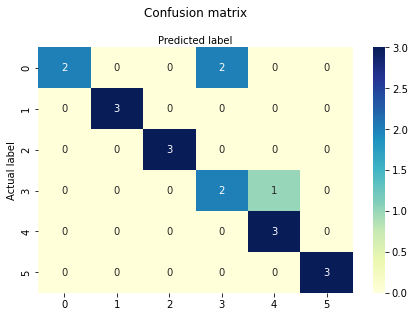

In [56]:
class_names = classes # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
accuracy = pipeline.score(x,y)

In [58]:
l1_accuracy = accuracy
summary_data = {
                'Parameter':  ['Accuracy', 'Error Rate'],
                'Value': [f'{accuracy*100:.2f}%', f'{((1-accuracy)*100):.2f}%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameter')

,Value
Parameter,
Accuracy,84.21%
Error Rate,15.79%


In [59]:
probs = pipeline.predict_proba(x)
auc_score = roc_auc_score(y, probs, multi_class='ovo', average='weighted')
l1_auc = auc_score
print(f'AUC: {auc_score}')

AUC: 0.9570175438596491


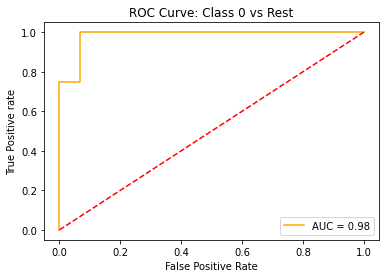

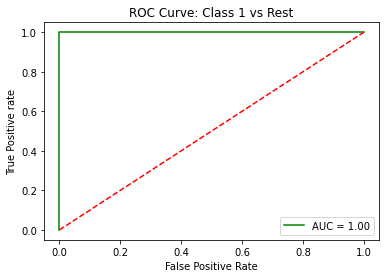

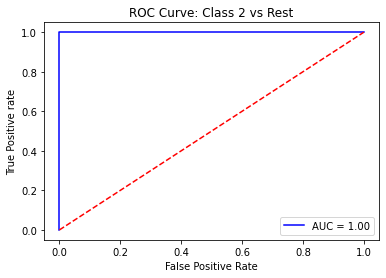

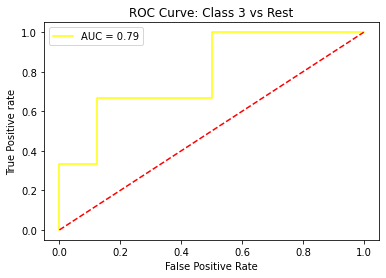

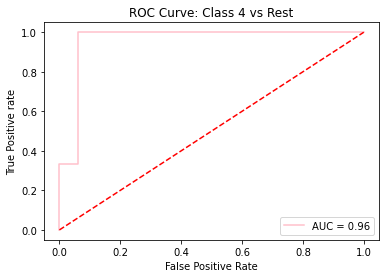

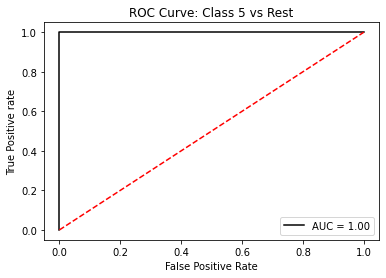

In [60]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y, probs[:,i], pos_label=i)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
# plotting 
colors = ['orange', 'green', 'blue', 'yellow', 'pink', 'black']
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i],color=colors[i], label = 'AUC = %0.2f' % roc_auc[i])
    plt.plot([0, 1], [0, 1],'r--', color='red')
    plt.title(f'ROC Curve: Class {i} vs Rest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()

#### 2. c) ii. Naive Bayes Classifier

#### Naive Bayes with Gaussian Priors

In [61]:
bayes_values_gb = []
for l in range(1,21):
    td_features = getTimeDomainFeaturesDivided(l,True)
    td_features = td_features.fillna(0)
    time_series_features = td_features['Activity']
    for i in range(l):
        selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
        temp = td_features[selectors]
        time_series_features = pd.concat([time_series_features, temp], axis=1)
    td_features = time_series_features.sample(frac=1).reset_index(drop=True)
    y = td_features['Activity']
    x = td_features.drop(['Activity'], axis= 1)
    y = y.replace('bending2', 'bending')
    y = y.replace('bending1', 'bending')
    classes = list(y.unique())
    y = y.map({ x: classes.index(x) for x in classes})
    model = GaussianNB()
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),('m',model)])
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    n_scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    bayes_values_gb.append({
        'l': l,
        'Accuracy': np.mean(n_scores)
    })

In [62]:
bayes_values_gb.sort(key = lambda x: x['Accuracy'], reverse=True)
for i in range(5):
    print(f'l: {bayes_values_gb[i]["l"]}, Accuracy: {bayes_values_gb[i]["Accuracy"]}')

l: 2, Accuracy: 0.7384615384615385
l: 1, Accuracy: 0.6967032967032967
l: 5, Accuracy: 0.6824175824175824
l: 6, Accuracy: 0.6241758241758241
l: 4, Accuracy: 0.6076923076923076


In [63]:
best_l_gb = bayes_values_gb[0]

In [64]:
l = best_l_gb['l']
td_features = getTimeDomainFeaturesDivided(l,True)
td_features = td_features.fillna(0)
time_series_features = td_features['Activity']
for i in range(l):
    selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
    temp = td_features[selectors]
    time_series_features = pd.concat([time_series_features, temp], axis=1)
td_features = time_series_features.sample(frac=1).reset_index(drop=True)
y = td_features['Activity']
x = td_features.drop(['Activity'], axis= 1)
y = y.replace('bending2', 'bending')
y = y.replace('bending1', 'bending')
classes = list(y.unique())
y = y.map({ x: classes.index(x) for x in classes})
model = GaussianNB()
pipeline = Pipeline(steps=[('scaler', StandardScaler()),('m',model)])
pipeline.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()), ('m', GaussianNB())])

In [65]:
td_features = getTimeDomainFeaturesDivided(l,False)
td_features = td_features.fillna(0)
time_series_features = td_features['Activity']
for i in range(l):
    selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
    temp = td_features[selectors]
    time_series_features = pd.concat([time_series_features, temp], axis=1)
td_features = time_series_features.sample(frac=1).reset_index(drop=True)
y = td_features['Activity']
x = td_features.drop(['Activity'], axis= 1)
y = y.replace('bending2', 'bending')
y = y.replace('bending1', 'bending')
y = y.map(mapping)
y_pred = pipeline.predict(x)
cnf_matrix = metrics.confusion_matrix(y, y_pred)

Text(0.5, 257.44, 'Predicted label')

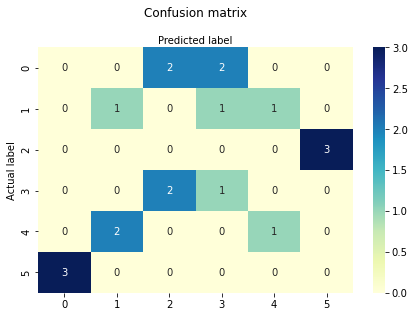

In [66]:
class_names = classes # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [67]:
accuracy = pipeline.score(x,y)

In [68]:
nb_gp_accuracy = accuracy
summary_data = {
                'Parameter':  ['Accuracy', 'Error Rate'],
                'Value': [f'{accuracy*100:.2f}%', f'{((1-accuracy)*100):.2f}%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameter')

,Value
Parameter,
Accuracy,15.79%
Error Rate,84.21%


In [69]:
probs = pipeline.predict_proba(x)
auc_score = roc_auc_score(y, probs, multi_class='ovo', average='weighted')
nb_gp_auc = auc_score
print(f'AUC: {auc_score}')

AUC: 0.6043859649122808


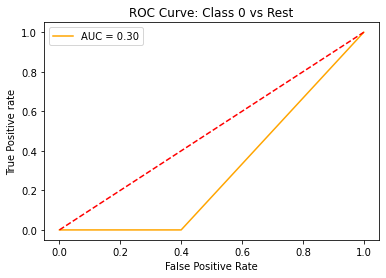

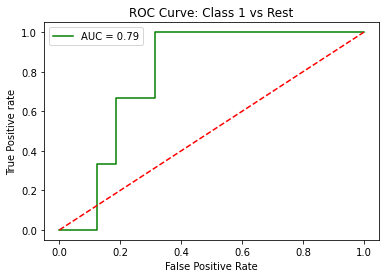

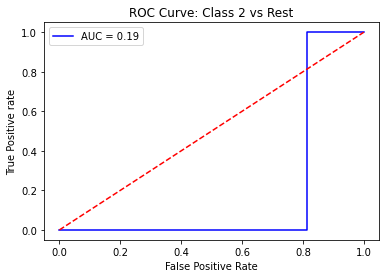

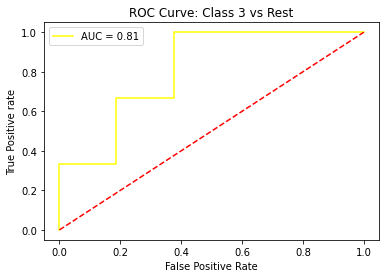

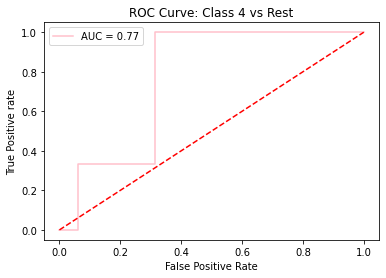

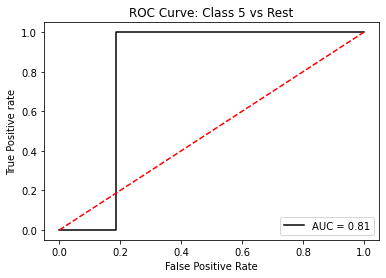

In [70]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y, probs[:,i], pos_label=i)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
# plotting 
colors = ['orange', 'green', 'blue', 'yellow', 'pink', 'black']
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i],color=colors[i], label = 'AUC = %0.2f' % roc_auc[i])
    plt.plot([0, 1], [0, 1],'r--', color='red')
    plt.title(f'ROC Curve: Class {i} vs Rest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()

#### Naive Bayes with Multinomial Priors

In [71]:
bayes_values_mp = []
for l in range(1,21):
    td_features = getTimeDomainFeaturesDivided(l,True)
    td_features = td_features.fillna(0)
    time_series_features = td_features['Activity']
    for i in range(l):
        selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
        temp = td_features[selectors]
        time_series_features = pd.concat([time_series_features, temp], axis=1)
    td_features = time_series_features.sample(frac=1).reset_index(drop=True)
    y = td_features['Activity']
    x = td_features.drop(['Activity'], axis= 1)
    y = y.replace('bending2', 'bending')
    y = y.replace('bending1', 'bending')
    classes = list(y.unique())
    y = y.map({ x: classes.index(x) for x in classes})
    model = MultinomialNB()
    pipeline = Pipeline(steps=[('scaler', MinMaxScaler()),('m',model)])
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    n_scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    bayes_values_mp.append({
        'l': l,
        'Accuracy': np.mean(n_scores)
    })

In [72]:
bayes_values_mp.sort(key = lambda x: x['Accuracy'], reverse=True)
for i in range(5):
    print(f'l: {bayes_values_mp[i]["l"]}, Accuracy: {bayes_values_mp[i]["Accuracy"]}')

l: 16, Accuracy: 0.6505494505494506
l: 12, Accuracy: 0.6373626373626374
l: 15, Accuracy: 0.6373626373626374
l: 17, Accuracy: 0.6373626373626373
l: 20, Accuracy: 0.6219780219780219


In [73]:
best_l_mp = bayes_values_mp[0]

In [74]:
l = best_l_mp['l']
td_features = getTimeDomainFeaturesDivided(l,True)
td_features = td_features.fillna(0)
time_series_features = td_features['Activity']
for i in range(l):
    selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
    temp = td_features[selectors]
    time_series_features = pd.concat([time_series_features, temp], axis=1)
td_features = time_series_features.sample(frac=1).reset_index(drop=True)
y = td_features['Activity']
x = td_features.drop(['Activity'], axis= 1)
y = y.replace('bending2', 'bending')
y = y.replace('bending1', 'bending')
classes = list(y.unique())
y = y.map({ x: classes.index(x) for x in classes})
model = MultinomialNB()
pipeline = Pipeline(steps=[('scaler', MinMaxScaler()),('m',model)])
pipeline.fit(x,y)

Pipeline(steps=[('scaler', MinMaxScaler()), ('m', MultinomialNB())])

In [75]:
td_features = getTimeDomainFeaturesDivided(l,False)
td_features = td_features.fillna(0)
time_series_features = td_features['Activity']
for i in range(l):
    selectors = [f'{three_features[j]} {6*(i) + int(three_timeseries[k])}' for j in range(3) for k in range(3)]
    temp = td_features[selectors]
    time_series_features = pd.concat([time_series_features, temp], axis=1)
td_features = time_series_features.sample(frac=1).reset_index(drop=True)
y = td_features['Activity']
x = td_features.drop(['Activity'], axis= 1)
y = y.replace('bending2', 'bending')
y = y.replace('bending1', 'bending')
y = y.map(mapping)
y_pred = pipeline.predict(x)
cnf_matrix = metrics.confusion_matrix(y, y_pred)

Text(0.5, 257.44, 'Predicted label')

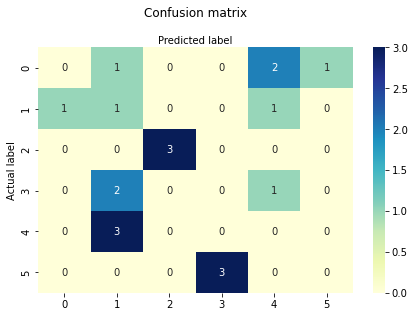

In [76]:
class_names = classes # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
accuracy = pipeline.score(x,y)

In [78]:
nb_mp_accuracy = accuracy
summary_data = {
                'Parameter':  ['Accuracy', 'Error Rate'],
                'Value': [f'{accuracy*100:.2f}%', f'{((1-accuracy)*100):.2f}%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameter')

,Value
Parameter,
Accuracy,21.05%
Error Rate,78.95%


In [79]:
probs = pipeline.predict_proba(x)
auc_score = roc_auc_score(y, probs, multi_class='ovo', average='weighted')
nb_mp_auc = auc_score
print(f'AUC: {auc_score}')

AUC: 0.46140350877192987


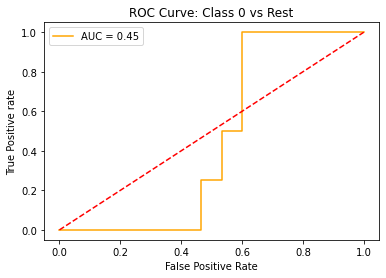

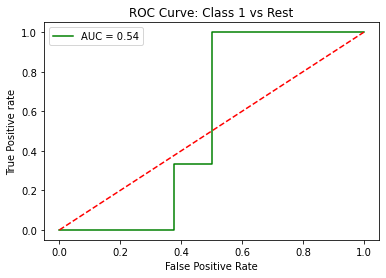

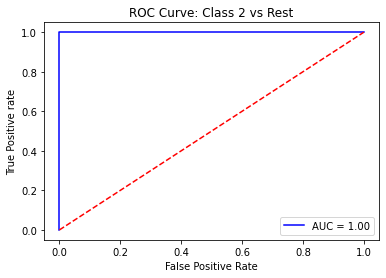

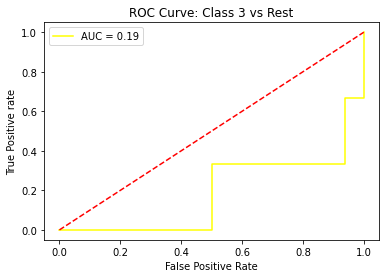

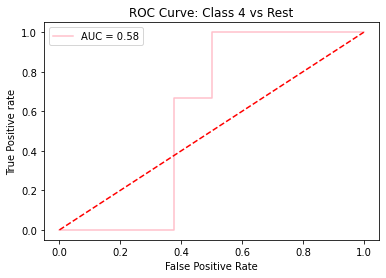

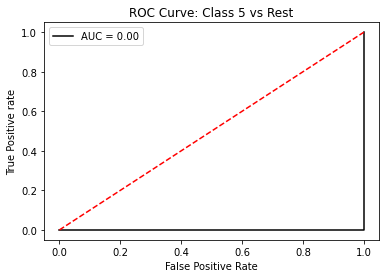

In [80]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y, probs[:,i], pos_label=i)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
# plotting 
colors = ['orange', 'green', 'blue', 'yellow', 'pink', 'black']
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i],color=colors[i], label = 'AUC = %0.2f' % roc_auc[i])
    plt.plot([0, 1], [0, 1],'r--', color='red')
    plt.title(f'ROC Curve: Class {i} vs Rest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()

#### Comparison of Naive Bayes Models

In [85]:
summary_data = {
                'Model':  ['Naive Bayes with Gaussian Priors', 'Naive Bayes with Multinomial Priors'],
                'Accuracy': [f'{nb_gp_accuracy*100:.2f}%', f'{nb_mp_accuracy*100:.2f}%'],
                'Error Rate': [f'{((1-nb_gp_accuracy)*100):.2f}%', f'{((1-nb_mp_accuracy)*100):.2f}%'],
                'AUC': [f'{nb_gp_auc:.2f}', f'{nb_mp_auc:.2f}']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Model')

,Accuracy,Error Rate,AUC
Model,,,
Naive Bayes with Gaussian Priors,15.79%,84.21%,0.60
Naive Bayes with Multinomial Priors,21.05%,78.95%,0.46


#### Findings
1. The Naive Bayes Model with Gaussian Priors performs better than the model with Multinomial Priors as it has a higher AUC, even though the Naive Bayes Model with Multinomial priors has a higher accuracy.

#### 2. c) iii.

In [82]:
summary_data = {
                'Model':  ['L1 Penalized Multinomial Regression', 'Naive Bayes with Gaussian Priors', 'Naive Bayes with Multinomial Priors'],
                'Accuracy': [f'{l1_accuracy*100:.2f}%', f'{nb_gp_accuracy*100:.2f}%', f'{nb_mp_accuracy*100:.2f}%'],
                'Error Rate': [f'{((1-l1_accuracy))*100:.2f}%', f'{((1-nb_gp_accuracy)*100):.2f}%', f'{((1-nb_mp_accuracy)*100):.2f}%'],
                'AUC': [f'{l1_auc:.2f}', f'{nb_gp_auc:.2f}', f'{nb_mp_auc:.2f}']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Model')

,Accuracy,Error Rate,AUC
Model,,,
L1 Penalized Multinomial Regression,84.21%,15.79%,0.96
Naive Bayes with Gaussian Priors,15.79%,84.21%,0.60
Naive Bayes with Multinomial Priors,21.05%,78.95%,0.46


#### Findings
1. From the results above, we can clearly see that the L1 penalized multinomial regression model is the better multi-class classification model as it has a much higher accuracy and AUC compared to the Naive Bayes models.

#### 3. ISLR 4.8.3

In [83]:
IFrame("../data/4.8.3.pdf", width=900, height=1000)

#### 4. ISLR 4.8.7

In [84]:
IFrame("../data/4.8.7.pdf", width=900, height=1000)